1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

In [1]:
# Импортируем библиотеки для скачивания с сайта Kaggle
from pathlib import Path
import opendatasets as od

dataset_path = Path('house-prices-advanced-regression-techniques')
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data')

2. Загрузите датасет в pandas DataFrame под названием df.

In [3]:
import pandas as pd
import numpy as np

In [118]:
df = pd.read_csv('train.csv', encoding = '1251', index_col='Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

3. Выполните предварительную обработку данных, выполнив следующие шаги:

a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).

b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

Обработка столбцов, в которых есть пропущенные значения:
'LotFrontage' - Длина улицы в линейных футах, соединенной с объектом недвижимости

In [120]:
# Определим тип данных, количество значений
df['LotFrontage'].info()

# Подсчитаем варианты значений в столбце
df['LotFrontage'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [121]:
# Заполним пустые значения средними значениями
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [122]:
# Выведем результат
df['LotFrontage'].unique()

array([ 65.        ,  80.        ,  68.        ,  60.        ,
        84.        ,  85.        ,  75.        ,  70.04995837,
        51.        ,  50.        ,  70.        ,  91.        ,
        72.        ,  66.        , 101.        ,  57.        ,
        44.        , 110.        ,  98.        ,  47.        ,
       108.        , 112.        ,  74.        , 115.        ,
        61.        ,  48.        ,  33.        ,  52.        ,
       100.        ,  24.        ,  89.        ,  63.        ,
        76.        ,  81.        ,  95.        ,  69.        ,
        21.        ,  32.        ,  78.        , 121.        ,
       122.        ,  40.        , 105.        ,  73.        ,
        77.        ,  64.        ,  94.        ,  34.        ,
        90.        ,  55.        ,  88.        ,  82.        ,
        71.        , 120.        , 107.        ,  92.        ,
       134.        ,  62.        ,  86.        , 141.        ,
        97.        ,  54.        ,  41.        ,  79.  

In [123]:
# Анализ данных после заполнения пустыми значениями показал, что появились данные с типом float.
# Переведем данные в int, предварительно округлив их.

df['LotFrontage'] = df['LotFrontage'].round()

In [124]:
df['LotFrontage'] = df['LotFrontage'].astype(int)

In [125]:
# Выведем результат
df['LotFrontage'].unique()

array([ 65,  80,  68,  60,  84,  85,  75,  70,  51,  50,  91,  72,  66,
       101,  57,  44, 110,  98,  47, 108, 112,  74, 115,  61,  48,  33,
        52, 100,  24,  89,  63,  76,  81,  95,  69,  21,  32,  78, 121,
       122,  40, 105,  73,  77,  64,  94,  34,  90,  55,  88,  82,  71,
       120, 107,  92, 134,  62,  86, 141,  97,  54,  41,  79, 174,  99,
        67,  83,  43, 103,  93,  30, 129, 140,  35,  37, 118,  87, 116,
       150, 111,  49,  96,  59,  36,  56, 102,  58,  38, 109, 130,  53,
       137,  45, 106, 104,  42,  39, 144, 114, 128, 149, 313, 168, 182,
       138, 160, 152, 124, 153,  46])

Обработка столбцов, в которых есть пропущенные значения:
'Alley' - Тип подъездной аллеи к объекту недвижимости

In [126]:
# Определим тип данных, количество значений
df['Alley'].info()

# Подсчитаем варианты значений в столбце
df['Alley'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: Alley
Non-Null Count  Dtype 
--------------  ----- 
91 non-null     object
dtypes: object(1)
memory usage: 22.8+ KB


Grvl    50
Pave    41
Name: Alley, dtype: int64

In [127]:
# Заполним пустые значения на моду
df['Alley'] = df['Alley'].fillna(df['Alley'].mode().iloc[0])

# Выведем результат
df['Alley'].unique()

array(['Grvl', 'Pave'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'MasVnrType' - Тип облицовки каменной кладки

In [128]:
# Определим тип данных, количество значений
df['MasVnrType'].info()

# Подсчитаем варианты значений в столбце
df['MasVnrType'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: MasVnrType
Non-Null Count  Dtype 
--------------  ----- 
1452 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [129]:
# Заполним пустые ячейки значением "NotDefined"
df['MasVnrType'] = df['MasVnrType'].fillna('NotDefined')

# Выведем результат
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'NotDefined'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'MasVnrArea' - Тип облицовки каменной кладки

In [138]:
# Определим тип данных, количество значений
df['MasVnrArea'].info()

# Подсчитаем варианты значений в столбце
df['MasVnrArea'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1452 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [52]:
# Заполним пустые значения средними значениями
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

# Выведем результат
df['MasVnrArea'].unique()

array([1.96000000e+02, 0.00000000e+00, 1.62000000e+02, 3.50000000e+02,
       1.86000000e+02, 2.40000000e+02, 2.86000000e+02, 3.06000000e+02,
       2.12000000e+02, 1.80000000e+02, 3.80000000e+02, 2.81000000e+02,
       6.40000000e+02, 2.00000000e+02, 2.46000000e+02, 1.32000000e+02,
       6.50000000e+02, 1.01000000e+02, 4.12000000e+02, 2.72000000e+02,
       4.56000000e+02, 1.03100000e+03, 1.78000000e+02, 5.73000000e+02,
       3.44000000e+02, 2.87000000e+02, 1.67000000e+02, 1.11500000e+03,
       4.00000000e+01, 1.04000000e+02, 5.76000000e+02, 4.43000000e+02,
       4.68000000e+02, 6.60000000e+01, 2.20000000e+01, 2.84000000e+02,
       7.60000000e+01, 2.03000000e+02, 6.80000000e+01, 1.83000000e+02,
       4.80000000e+01, 2.80000000e+01, 3.36000000e+02, 6.00000000e+02,
       7.68000000e+02, 4.80000000e+02, 2.20000000e+02, 1.84000000e+02,
       1.12900000e+03, 1.16000000e+02, 1.35000000e+02, 2.66000000e+02,
       8.50000000e+01, 3.09000000e+02, 1.36000000e+02, 2.88000000e+02,
      

Обработка столбцов, в которых есть пропущенные значения:
'BsmtQual' - Высота подвала

In [139]:
# Определим тип данных, количество значений
df['BsmtQual'].info()

# Подсчитаем варианты значений в столбце
df['BsmtQual'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: BsmtQual
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


TA    649
Gd    618
Ex    121
NC     37
Fa     35
Name: BsmtQual, dtype: int64

In [140]:
# Заполним пустые ячейки значением "NotChecked (NC)"
df['BsmtQual'] = df['BsmtQual'].fillna('NC')

# Выведем результат
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NC', 'Fa'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'BsmtCond' - Оценка общего состояния подвала

In [141]:
# Определим тип данных, количество значений
df['BsmtCond'].info()

# Подсчитаем варианты значений в столбце
df['BsmtCond'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: BsmtCond
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


TA    1311
Gd      65
Fa      45
Nf      37
Po       2
Name: BsmtCond, dtype: int64

In [142]:
# Заполним пустые ячейки значением "No info (Nf)""
df['BsmtCond'] = df['BsmtCond'].fillna('Nf')

# Выведем результат
df['BsmtCond'].unique()

array(['TA', 'Gd', 'Nf', 'Fa', 'Po'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'BsmtExposure' - Стены подвала на уровне дорожек или сада

In [143]:
# Заполним пустые ячейки значением "No info (nf)"
df['BsmtExposure'] = df['BsmtExposure'].fillna('nf')

# Выведем результат
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'nf'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'BsmtFinType1' - Оценка площади готового цокольного этажа

In [144]:
# Заполним пустые ячейки значением "No info (nf)"
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('nf')

# Выведем результат
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'nf', 'LwQ'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'BsmtFinType2' - Оценка площади готового подвала (при наличии нескольких типов)

In [145]:
# Заполним пустые ячейки значением "No info (nf)"
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('nf')

# Выведем результат
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'nf', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'Electrical' - Система электроснабжения

In [146]:
# Определим тип данных, количество значений
df['Electrical'].info()

# Подсчитаем варианты значений в столбце
df['Electrical'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: Electrical
Non-Null Count  Dtype 
--------------  ----- 
1459 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [147]:
# Заполним пустые значения на моду
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode().iloc[0])

# Выведем результат
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'FireplaceQu' - Оценка состояния камина

In [148]:
# Определим тип данных, количество значений
df['FireplaceQu'].info()

# Подсчитаем варианты значений в столбце
df['FireplaceQu'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: FireplaceQu
Non-Null Count  Dtype 
--------------  ----- 
770 non-null    object
dtypes: object(1)
memory usage: 22.8+ KB


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [149]:
# Заполним пустые значения на моду
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode().iloc[0])

# Выведем результат
df['FireplaceQu'].unique()

array(['Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'GarageType' - Расположение гаража

In [150]:
# Определим тип данных, количество значений
df['GarageType'].info()

# Подсчитаем варианты значений в столбце
df['GarageType'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: GarageType
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [151]:
# Заполним пустые ячейки значением "NoType"
df['GarageType'] = df['GarageType'].fillna('NoType')

# Выведем результат
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NoType', 'Basment',
       '2Types'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'GarageYrBlt' - Год постройки гаража

In [152]:
# Определим тип данных, количество значений
df['GarageYrBlt'].info()

# Подсчитаем варианты значений в столбце
df['GarageYrBlt'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: GarageYrBlt
Non-Null Count  Dtype  
--------------  -----  
1379 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [153]:
# Заполним пустые значения на моду
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode().iloc[0])

# Выведем результат
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1983., 1977., 1997., 1985., 1963.,
       1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989., 1915.,
       1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900., 1979.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933.])

Обработка столбцов, в которых есть пропущенные значения:
'GarageFinish' - Стадия внутренней отделки гаража

In [154]:
# Определим тип данных, количество значений
df['GarageFinish'].info()

# Подсчитаем варианты значений в столбце
df['GarageFinish'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: GarageFinish
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [155]:
# Заполним пустые ячейки значением "NoFound(Nf)"
df['GarageFinish'] = df['GarageFinish'].fillna('Nf')

# Выведем результат
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'Nf'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'GarageQual' - Качество гаража

In [156]:
# Определим тип данных, количество значений
df['GarageQual'].info()

# Подсчитаем варианты значений в столбце
df['GarageQual'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: GarageQual
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [157]:
# Заполним пустые ячейки значением "NoInfo(Ni)"
df['GarageQual'] = df['GarageQual'].fillna('Ni')

# Выведем результат
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Ni', 'Ex', 'Po'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'GarageCond' - Состояние гаража

In [158]:
# Определим тип данных, количество значений
df['GarageCond'].info()

# Подсчитаем варианты значений в столбце
df['GarageCond'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: GarageCond
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [159]:
# Заполним пустые значения на моду
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode().iloc[0])

# Выведем результат
df['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'PoolQC' - Состояние бассейна

In [160]:
# Определим тип данных, количество значений
df['PoolQC'].info()

# Подсчитаем варианты значений в столбце
df['PoolQC'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: PoolQC
Non-Null Count  Dtype 
--------------  ----- 
7 non-null      object
dtypes: object(1)
memory usage: 22.8+ KB


Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [161]:
# Заполним пустые ячейки значением "NoInfo(ni)"
df['PoolQC'] = df['PoolQC'].fillna('ni')

# Выведем результат
df['PoolQC'].unique()

array(['ni', 'Ex', 'Fa', 'Gd'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'Fence' - Состояние ограждения

In [162]:
# Определим тип данных, количество значений
df['Fence'].info()

# Подсчитаем варианты значений в столбце
df['Fence'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: Fence
Non-Null Count  Dtype 
--------------  ----- 
281 non-null    object
dtypes: object(1)
memory usage: 22.8+ KB


MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [163]:
# Заполним пустые ячейки значением "NoInfo(NoInf)"
df['Fence'] = df['Fence'].fillna('NoInf')

# Выведем результат
df['Fence'].unique()

array(['NoInf', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

Обработка столбцов, в которых есть пропущенные значения:
'MiscFeature' - Прочие функции, не включенные в другие категории

In [164]:
# Определим тип данных, количество значений
df['MiscFeature'].info()

# Подсчитаем варианты значений в столбце
df['MiscFeature'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 1 to 1460
Series name: MiscFeature
Non-Null Count  Dtype 
--------------  ----- 
54 non-null     object
dtypes: object(1)
memory usage: 22.8+ KB


Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [165]:
# Заполним пустые ячейки значением "NoInfo(NotInf)"
df['MiscFeature'] = df['MiscFeature'].fillna('NotInf')

# Выведем результат
df['MiscFeature'].unique()

array(['NotInf', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [166]:
# Проверим на дубликаты
duplicates = df.duplicated()
duplicates

Id
1       False
2       False
3       False
4       False
5       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Length: 1460, dtype: bool

In [167]:
# Цикл для поиска объектов и их проверки
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].unique()
        print(f"Уникальные значения в столбце '{col}': {unique_values}")

Уникальные значения в столбце 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Уникальные значения в столбце 'Street': ['Pave' 'Grvl']
Уникальные значения в столбце 'Alley': ['Grvl' 'Pave']
Уникальные значения в столбце 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Уникальные значения в столбце 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Уникальные значения в столбце 'Utilities': ['AllPub' 'NoSeWa']
Уникальные значения в столбце 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Уникальные значения в столбце 'LandSlope': ['Gtl' 'Mod' 'Sev']
Уникальные значения в столбце 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Уникальные значения в столбце 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Уникальные значения в столбце 'Condition2': ['Norm' 'Artery' 

Нет необходимости переводить объектные типы в числовые, т.к. все значения объектных типов - строки.

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int32  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:

a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?

b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?

c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.

d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [169]:
# Анализ значения переменной 'SalePrice'
df['SalePrice'].describe().round(2)

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

In [170]:
# Импортируем модуля статистики
from scipy import stats

In [171]:
# Проверка значений в столбце'SalePrice' на выбросы
z = np.abs(stats.zscore(df['SalePrice'])) # вычисляем z-оценки для столбца SalePrice в df
threshold = 3 # установка максимального значения z-score
outliners = df['SalePrice'][z > threshold] # выявление выбросов по z-score 

In [172]:
df['SalePrice'].mean() # определяе средние значение

180921.19589041095

In [173]:
# печатаем выбросы
outliners

Id
59      438780
179     501837
186     475000
350     437154
390     426000
441     555000
474     440000
497     430000
528     446261
592     451950
665     423000
692     755000
770     538000
799     485000
804     582933
899     611657
1047    556581
1143    424870
1170    625000
1183    745000
1244    465000
1374    466500
Name: SalePrice, dtype: int64

In [174]:
# Импортируем библиотеки для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

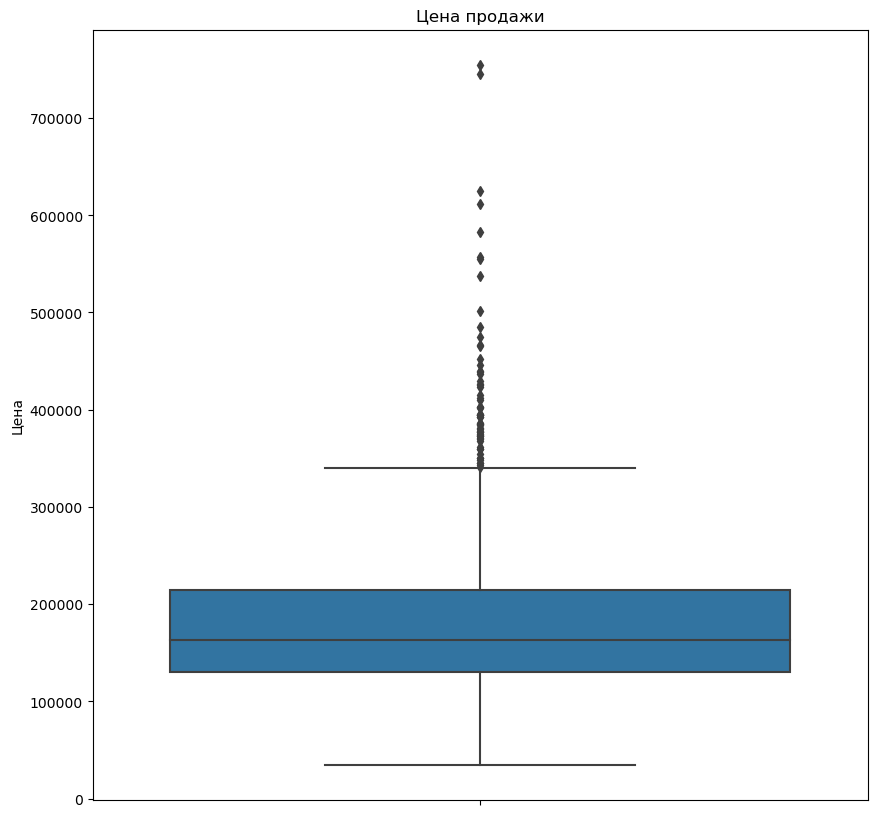

In [175]:
# Визуализация выбросов с помощью графика "Ящик с усами"
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, y='SalePrice')
plt.title('Цена продажи')
plt.ylabel('Цена')
plt.show()

In [176]:
# # Выбросы определяются как значения ниже Q1−1.5×IQRQ1−1.5×IQR или выше Q3+1.5×IQRQ3+1.5×IQR, где Q1Q1 и Q3Q3 
# Q1 = df['SalePrice'].quantile(0.25)
# Q3 = df['SalePrice'].quantile(0.75)
# IQR = Q3 - Q1

# # Определение границ для выбросов
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Фильтрация выбросов
# df_filtered = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]

# print(df_filtered) # данные очищенные от выбросов

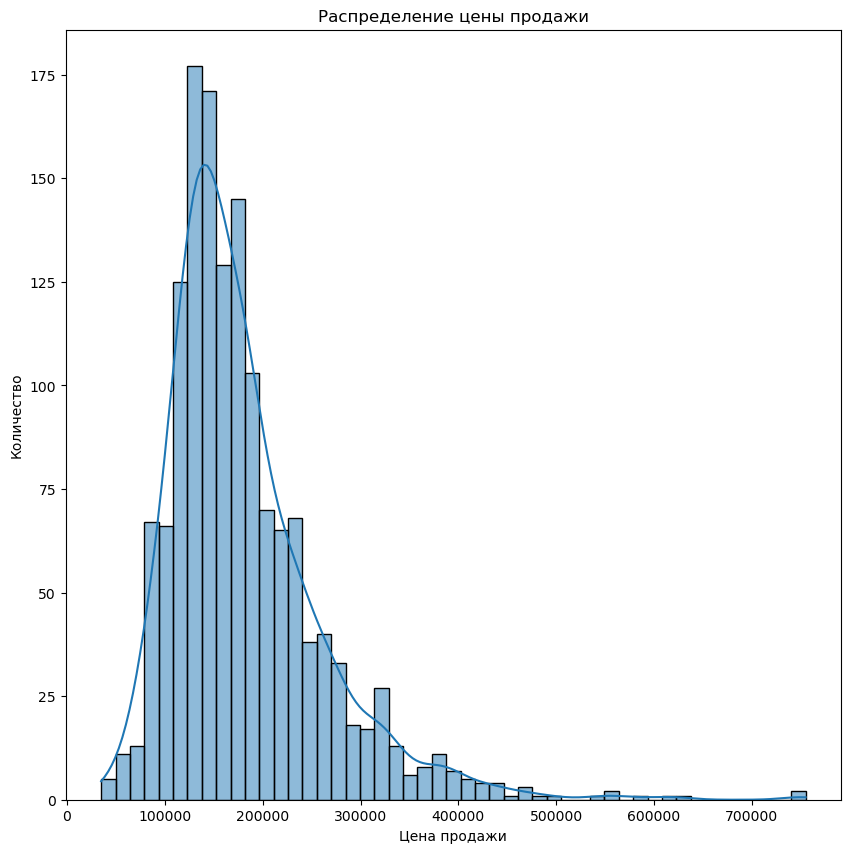

In [177]:
# Делаем визуальное распределение целевой переменной 'SalePrice'
plt.figure(figsize=(10, 10))
sns.histplot(df["SalePrice"], kde=True)
plt.xlabel("Цена продажи")
plt.ylabel("Количество")
plt.title("Распределение цены продажи")
plt.show()

In [178]:
# Коэффициент асимметрии и эксцесса
skewness = df['SalePrice'].skew()
kurtosis = df['SalePrice'].kurt()
print(f"Асимметрия: {skewness}")
print(f"Эксцесс: {kurtosis}")

# Тест нормальности
shapiro_test = stats.shapiro(df['SalePrice'])
print(f"Тест Шапиро-Уилка: {shapiro_test}")

Асимметрия: 1.8828757597682129
Эксцесс: 6.536281860064529
Тест Шапиро-Уилка: ShapiroResult(statistic=0.869672954082489, pvalue=3.2072044604461286e-33)


Распределение не нормальное, т.к. тест Шапиро-Уилка показал очень маленькое p-значение, что отвергает предположение о том, что данные имеют нормальное распределение.

In [179]:
# Пробуем рассчет коэффициента корреляции Спирмена
# Модуль для срасчёта
from sklearn.isotonic import spearmanr
# Переменная как основа для анализа
variable = 'SalePrice'
# Выбираем только переменные с числами
quantitative_vars = df.select_dtypes(include=['int64', 'float64'])
# Словарь для хранения результата
results = {}

for col in quantitative_vars.columns:
    if col != variable:
        # Для каждой колонки рассчитываем коэффициент корреляции Спирмена 
        spearman_corr, p_value = spearmanr(df[variable], df[col])
        results[col] = {'Spearman_corr': spearman_corr, 'p_value': p_value}

results_df = pd.DataFrame.from_dict(results, orient='index')

print("Коэффициенты Спирмена и р-значения переменной ", variable, ":")
print(results_df)

Коэффициенты Спирмена и р-значения переменной  SalePrice :
               Spearman_corr        p_value
MSSubClass          0.007192   7.836360e-01
LotArea             0.456461   4.871581e-76
OverallQual         0.809829   0.000000e+00
OverallCond        -0.129325   7.118552e-07
YearBuilt           0.652682  5.693841e-178
YearRemodAdd        0.571159  3.557233e-127
MasVnrArea               NaN            NaN
BsmtFinSF1          0.301871   3.857909e-32
BsmtFinSF2         -0.038806   1.383221e-01
BsmtUnfSF           0.185197   9.886861e-13
TotalBsmtSF         0.602725  4.157300e-145
1stFlrSF            0.575408  1.780246e-129
2ndFlrSF            0.293598   2.040344e-30
LowQualFinSF       -0.067719   9.645078e-03
GrLivArea           0.731310  1.431015e-244
BsmtFullBath        0.225125   3.130150e-18
BsmtHalfBath       -0.012189   6.416775e-01
FullBath            0.635957  2.729574e-166
HalfBath            0.343008   1.422950e-41
BedroomAbvGr        0.234907   9.402132e-20
KitchenAbvGr     

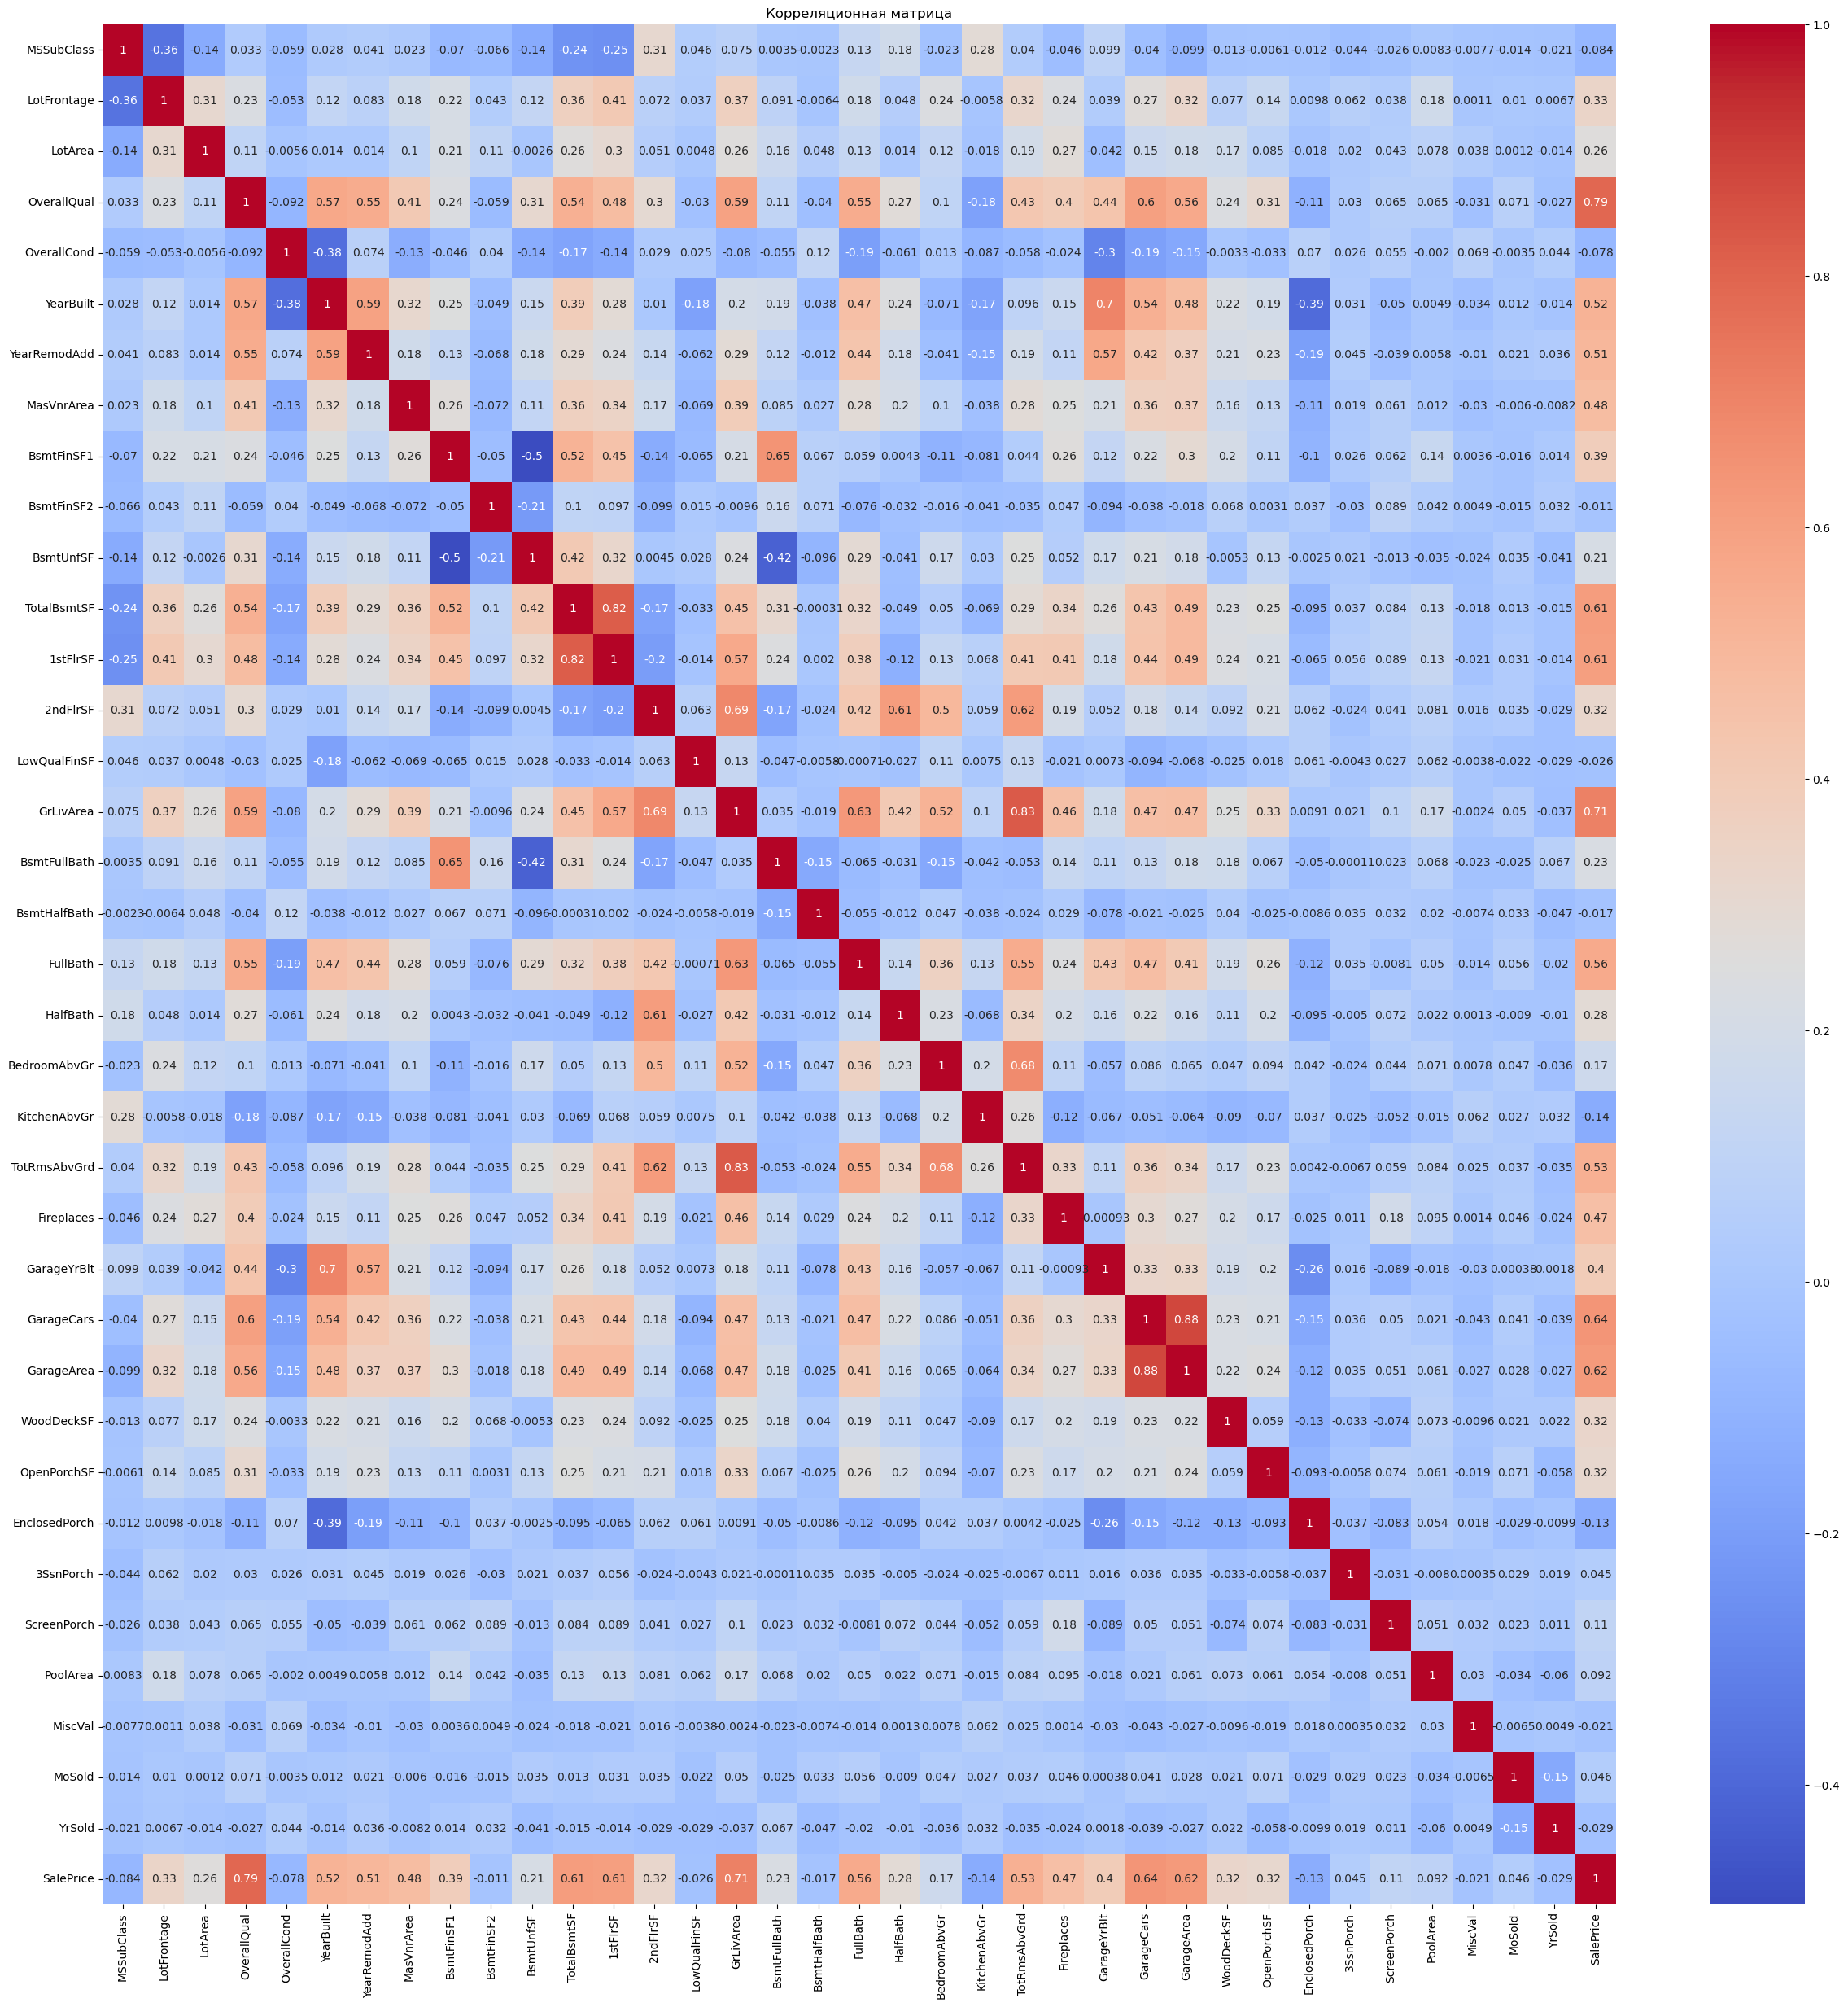

In [181]:
# Корреляционная матрица
# Исключаем нечисловые колонки
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(30, 30))
# Вычисляем корреляционную матрицу для числовых данных
correlation_matrix = numeric_df.corr()

# Визуализируем корреляционную матрицу
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

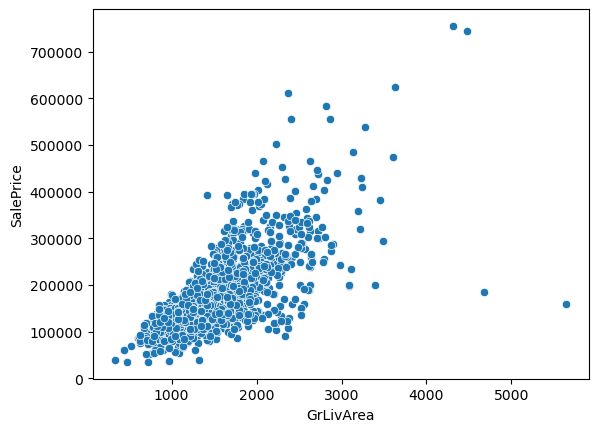

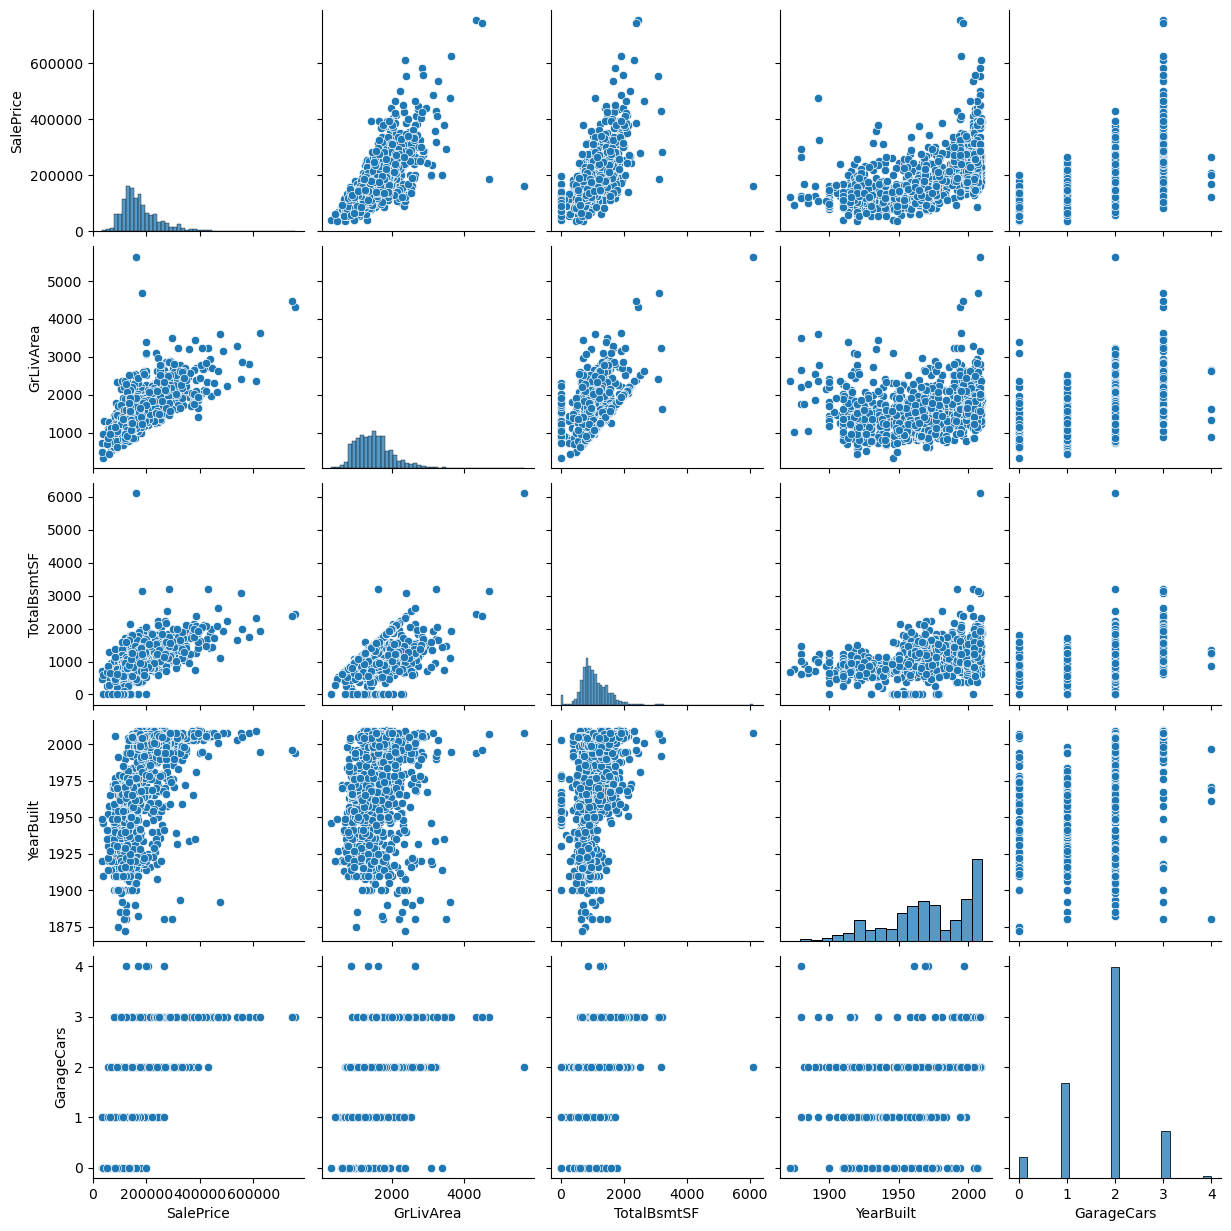

In [180]:
# Scatter plot для 'SalePrice' и 'GrLivArea'
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.show()

# Pair plot для нескольких переменных
sns.pairplot(df, vars=['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageCars'])
plt.show()

In [182]:
impotant = ['OverallQual', 'GrLivArea', 'GarageCars']

In [183]:
df[impotant].describe().round(2)

,OverallQual,GrLivArea,GarageCars
count,1460.00,1460.00,1460.00
mean,6.10,1515.46,1.77
std,1.38,525.48,0.75
min,1.00,334.00,0.00
25%,5.00,1129.50,1.00
50%,6.00,1464.00,2.00
75%,7.00,1776.75,2.00
max,10.00,5642.00,4.00


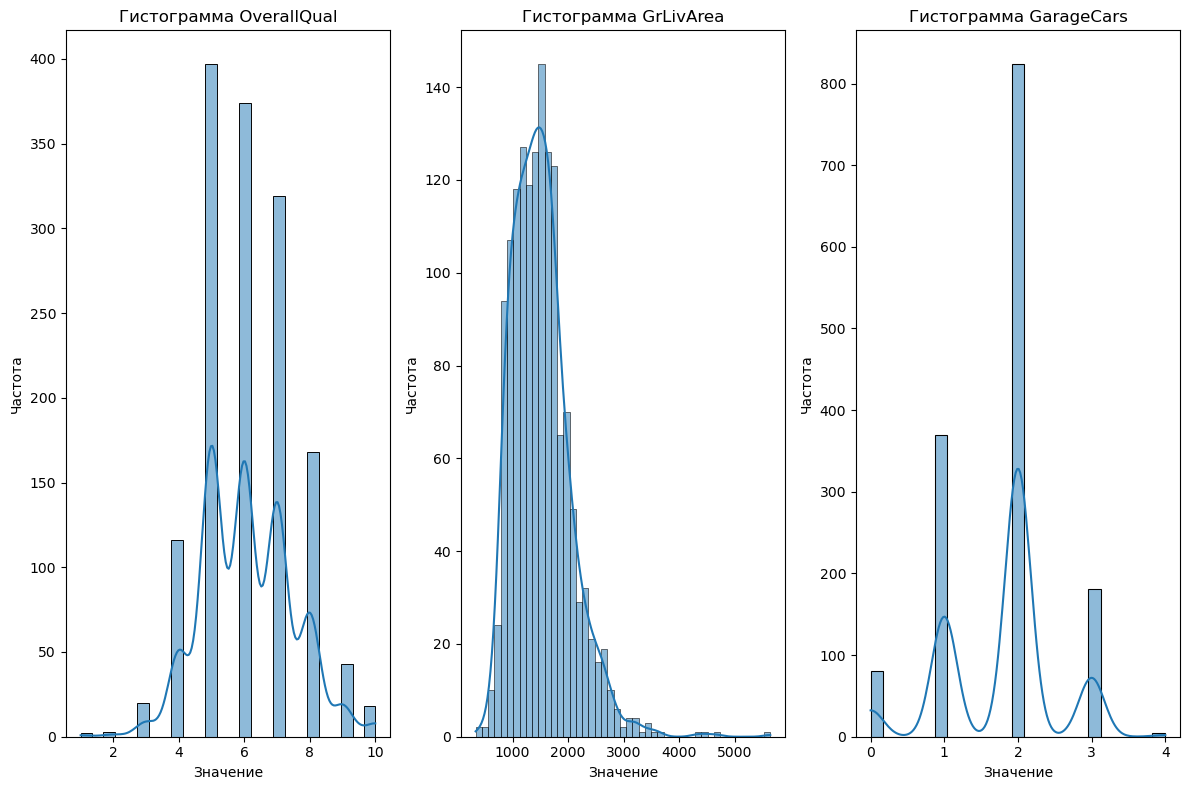

In [184]:
# Отрисовка гистограммы распределения важных переменных
num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(impotant):
    sns.histplot(data=df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

5. Выполните проектирование признаков путем реализации следующих преобразований:

a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.

b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [231]:
# Для работы с преобразованиями на всякий случай сделаем копию датафрейма
df_new = df.copy()

One-hot encoding для переменной CentralAir (Наличие центрального кондиционера)

In [232]:
df_new['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [233]:
df_new['CentralAir']

Id
1       Y
2       Y
3       Y
4       Y
5       Y
       ..
1456    Y
1457    Y
1458    Y
1459    Y
1460    Y
Name: CentralAir, Length: 1460, dtype: object

In [234]:
df_new_one_hot = pd.get_dummies(df_new, columns=['CentralAir'])

In [235]:
df_new_one_hot

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_N,CentralAir_Y
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NoInf,NotInf,0,2,2008,WD,Normal,208500,0,1
2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,NoInf,NotInf,0,5,2007,WD,Normal,181500,0,1
3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,NoInf,NotInf,0,9,2008,WD,Normal,223500,0,1
4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,NoInf,NotInf,0,2,2006,WD,Abnorml,140000,0,1
5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,NoInf,NotInf,0,12,2008,WD,Normal,250000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NoInf,NotInf,0,8,2007,WD,Normal,175000,0,1
1457,20,RL,85,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,MnPrv,NotInf,0,2,2010,WD,Normal,210000,0,1
1458,70,RL,66,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0,1


In [237]:
df_new_one_hot['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [226]:
# Сопоставление противоречивых значений в столбце "Kitchen quality" - состояние кухни
# port_map = {'Ex' : 'E', 'Gd' : 'G', 'TA' : 'T', 'Fa' : 'F', 'Po' : 'P'}
# df_new['KitchenQual'] = df_new['KitchenQual'].map(port_map)

In [238]:
# Выполнение label encoding столбца "Kitchen quality"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_new_one_hot['KitchenQual'] = le.fit_transform(df_new_one_hot['KitchenQual'].astype(str))

In [239]:
df_new['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [240]:
df_new_one_hot['KitchenQual'].value_counts()

3    735
2    586
0    100
1     39
Name: KitchenQual, dtype: int64

6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [241]:
# Сохранение DataFrame с изменениями
df_new_one_hot.to_csv('cleaned_house_prices.csv', index=False)